In [21]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import accuracy_score, classification_report

In [22]:

class NaiveBayes:
    def __init__(self):
        self.class_probs = None
        self.word_probs = None

    def fit(self, x, y):

        n_samples, n_features = x.shape
        self.classes = np.unique(y)
        n_classes = len(self.classes)

        self.class_probs = np.zeros(n_classes)
        self.word_probs = np.zeros((n_classes, n_features))

        for idx, c in enumerate(self.classes):
            x_c = x[y == c]
            self.class_probs[idx] = x_c.shape[0] / n_samples
            self.word_probs[idx] = (x_c.sum(axis=0) + 1) / (x_c.sum() + n_features)

    def predict(self, x):

        y_pred = []
        for doc in x:
            class_scores = []
            for idx, c in enumerate(self.classes):
                score = np.log(self.class_probs[idx]) + np.sum(doc * np.log(self.word_probs[idx]))
                class_scores.append(score)
            y_pred.append(self.classes[np.argmax(class_scores)])
        return np.array(y_pred)

In [23]:
if __name__ == "__main__":
    dataset = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
    texts = dataset.data
    labels = dataset.target

    vectorizer = TfidfVectorizer(max_features=10000, stop_words='english', binary=False)
    X = vectorizer.fit_transform(texts)
    y = np.array(labels)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

    nb_classifier = NaiveBayes()
    nb_classifier.fit(X_train, y_train)

    y_pred = nb_classifier.predict(X_test)

    print("Accuracy:", accuracy_score(y_test, y_pred))

    print(classification_report(y_test, y_pred, target_names=dataset.target_names))

Accuracy: 0.7286472148541114
                          precision    recall  f1-score   support

             alt.atheism       0.62      0.52      0.57       132
           comp.graphics       0.64      0.71      0.67       192
 comp.os.ms-windows.misc       0.74      0.70      0.72       196
comp.sys.ibm.pc.hardware       0.64      0.75      0.69       184
   comp.sys.mac.hardware       0.84      0.69      0.76       198
          comp.windows.x       0.77      0.80      0.79       186
            misc.forsale       0.79      0.80      0.80       200
               rec.autos       0.75      0.75      0.75       187
         rec.motorcycles       0.83      0.74      0.78       219
      rec.sport.baseball       0.53      0.87      0.66       179
        rec.sport.hockey       0.90      0.92      0.91       196
               sci.crypt       0.75      0.81      0.78       187
         sci.electronics       0.76      0.60      0.67       199
                 sci.med       0.85      0.80 

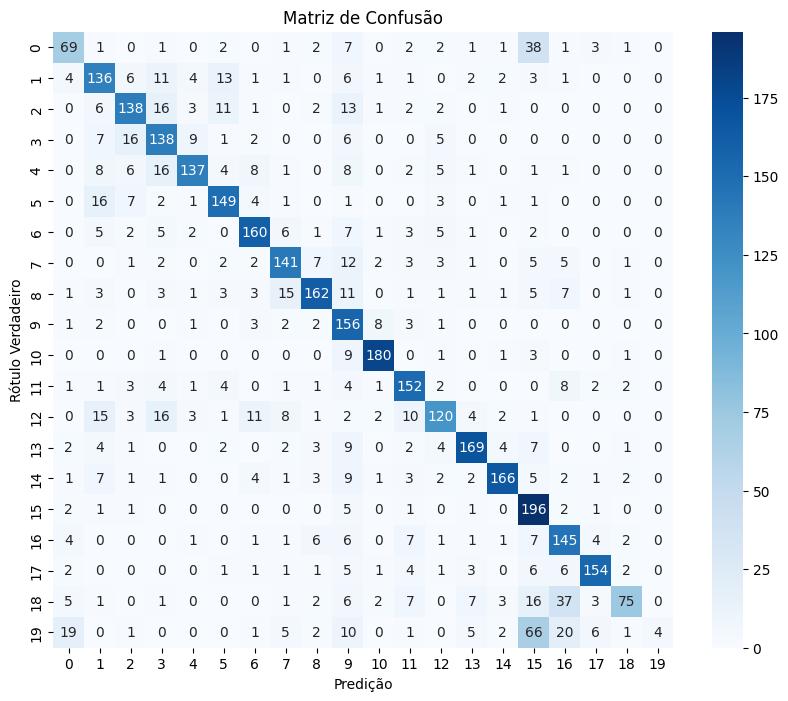

In [24]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
def plot_confusion_matrix(cm, num_classes):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(num_classes), yticklabels=range(num_classes))
    plt.xlabel('Predição')
    plt.ylabel('Rótulo Verdadeiro')
    plt.title('Matriz de Confusão')
    plt.show()

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, len(np.unique(y_test)))

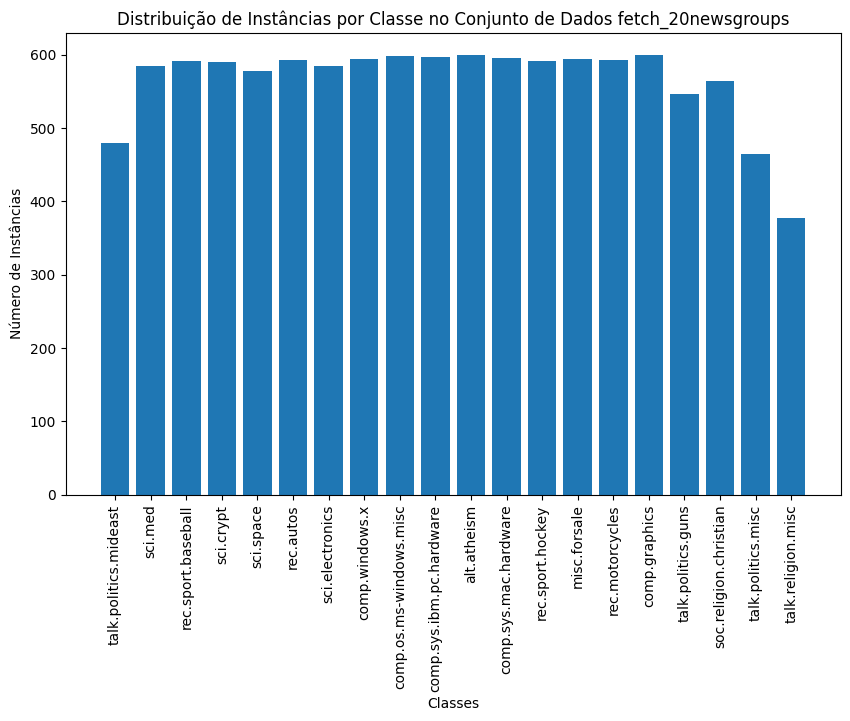

In [25]:
import pandas as pd

newsgroups = fetch_20newsgroups(subset='train')

class_counts = pd.Series(newsgroups.target).value_counts()

class_names = newsgroups.target_names

plt.figure(figsize=(10, 6))
plt.bar(class_counts.index, class_counts.values, tick_label=class_names)
plt.xlabel('Classes')
plt.ylabel('Número de Instâncias')
plt.title('Distribuição de Instâncias por Classe no Conjunto de Dados fetch_20newsgroups')
plt.xticks(rotation=90)
plt.show()
